## Pandas & Scikit-learn 예제

### 비만 데이터 예측하기

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes

# diabetes dataset 열기
X, y = load_diabetes(return_X_y=True, as_frame=True)

# description of the dataset
# print(load_diabetes()['DESCR'])

# Check out the features
print(X.head())
print()

# Check out the target
print(y.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

array([<Axes: title={'center': '-0.044641636506989144'}>,
       <Axes: title={'center': '0.05068011873981862'}>], dtype=object)

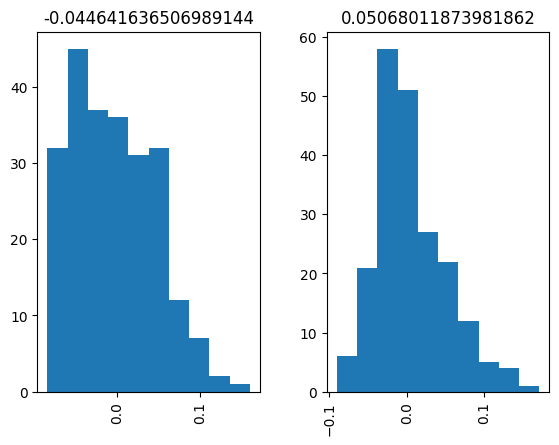

In [3]:
# Collect all the variables
all_variables = pd.concat([X, y], axis=1)

# Looking at statistical values
print(all_variables.describe())

# Check out the histogram for the BMI feature
all_variables.hist(column='bmi', by='sex')

In [4]:
from sklearn.linear_model import LinearRegression

X = X[['age', 'bmi']]
lin_reg = LinearRegression()

lin_reg.fit(X, y)

new_data = [[0, 0], [0.5, 0.3]]
lin_reg.predict(new_data)

/Users/sehyeon/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([152.13348416, 496.0852863 ])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)

# Creating a new linear model
lin_reg_mse = LinearRegression()

# Training the model on the training set
lin_reg_mse.fit(X_train, y_train)

(331, 2)
(111, 2)


LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Predicting on the test set
y_pred = lin_reg_mse.predict(X_test)

# Displaying the predictions
print(y_pred)

# Finding the error
mse = mean_squared_error(y_test, y_pred)
print(mse)

# Taking the square root
print(np.sqrt(mse))

[105.3176764  148.56786222 105.34981201 126.16373095 154.22863155
 191.35691408 124.44635685 135.05243803 179.78105189  63.96022986
 134.32091274  99.75262356 161.65428806 219.08784248  86.49152289
  99.57794872 200.18204028 144.76769655 174.19993125  85.36244452
 210.73991804 160.85918189 171.57635702 240.12463966  91.27753737
 197.35165561 164.29393008 136.08579991 139.36125074 166.01130418
 192.46992464 126.7205814   97.2562111  153.43352539 102.99662911
  85.61676804 173.86595904 115.04900273 158.0923781  172.33932758
 125.51185434  81.37153621 119.07204665 188.41543545 160.27088617
 131.61768984 167.29898959 100.07052796  62.115694   184.78994462
 113.95205997 202.01050833 108.54561415  99.03716608 221.52067406
 124.79639686 182.1824382  144.87879051  89.03544843 117.97510388
 174.47032257 163.81672832 133.31899613 169.19103852 135.24318067
 197.27200693 110.67660914 120.66225899  63.68983853 116.03485154
 254.38765695 139.02727854  99.49830004 156.8207605  179.35205354
  82.92961

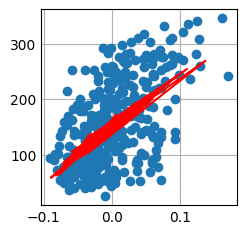

In [8]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()
ax.scatter(X_train['bmi'], y_train, linewidths=1)
ax.plot(X_test['bmi'], y_pred, color='red')

plt.xticks()
plt.yticks()

plt.show()

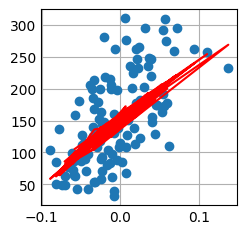

In [9]:
plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()
ax.scatter(X_test['bmi'], y_test, linewidths=1)
ax.plot(X_test['bmi'], y_pred, color='red')

plt.xticks()
plt.yticks()

plt.show()